In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Read the data from the file
df_students = pd.read_csv('grades.csv', delimiter=',', header='infer')

# Remove null rows
df_students = df_students.dropna(axis=0, how='any')

# Add a column if the student passed or failed
passes = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename('Pass')], axis=1)

print(df_students)

         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True


In [2]:
def show_distribution(var_data):

    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    median_val = var_data.median()
    mode_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            median_val,
                                                                                            mode_val,
                                                                                            max_val))
    
    fig, ax = plt.subplots(2, 1, figsize=(10, 4))

    # Histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frecuency')

    # Lines for trend metric
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=median_val, color='green', linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=mode_val, color='blue', linestyle='dashed', linewidth=2, label='Mode')
    ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)
    ax[0].legend()

    # Boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Grade')

    fig.suptitle('Data distibution of {}'.format(var_data.name))

    fig.show()

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\elias\AppData\Local\Temp\ipykernel_17536\3002654940.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


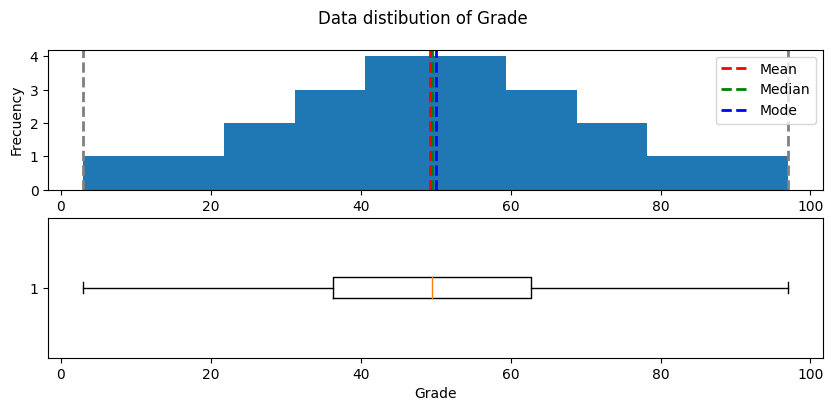

In [3]:
show_distribution(df_students['Grade'])

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\elias\AppData\Local\Temp\ipykernel_17536\3002654940.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


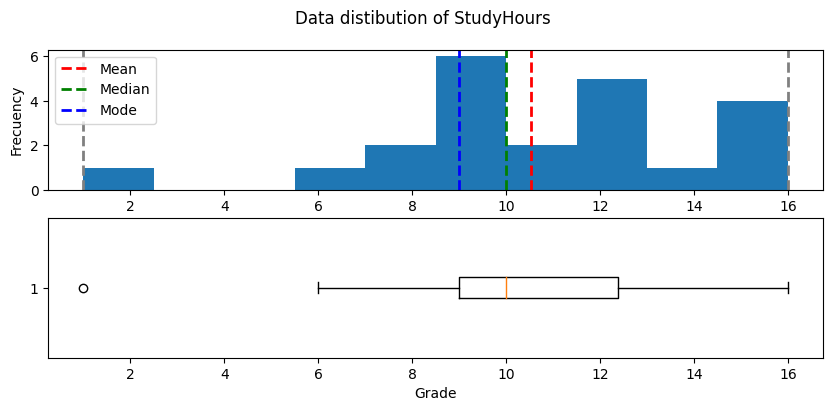

In [4]:
show_distribution(df_students['StudyHours'])

Note that the whiskers of the box plot only begin at around 6.0, indicating that the vast majority of the first quarter of the data is above this value. The minimum is marked with an o, indicating that it is statistically an outlier—a value that lies significantly outside the range of the rest of the distribution.

Outliers can occur for many reasons. Maybe a student meant to record "10" hours of study time, but entered "1" and missed the "0". Or maybe the student was abnormally lazy when it comes to studying! Either way, it's a statistical anomaly that doesn't represent a typical student. Let's see what the distribution looks like without it.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\elias\AppData\Local\Temp\ipykernel_17536\3002654940.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


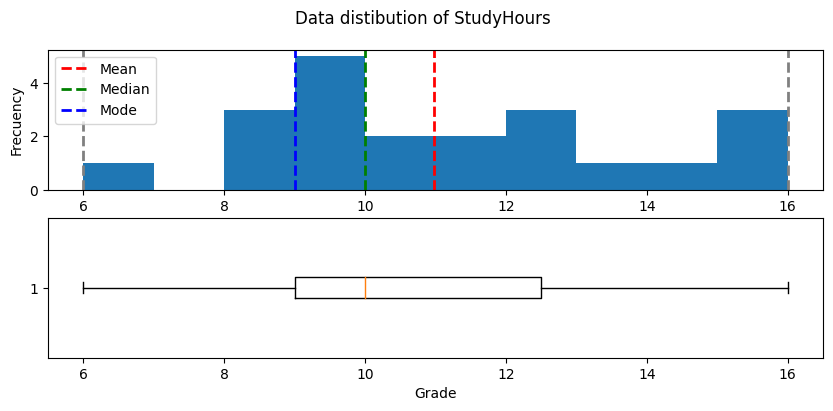

In [5]:
# We will ignore the students who sutidied 1 hour
show_distribution(df_students[df_students.StudyHours>1]['StudyHours'])

When we have more data available, our sample becomes more reliable. This makes it easier to consider outliers as being values that fall below or above percentiles within which most of the data lie. For example, the following code uses the Pandas quantile function to exclude observations below the 0.01th percentile (the value above which 99% of the data reside).

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\elias\AppData\Local\Temp\ipykernel_17536\3002654940.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


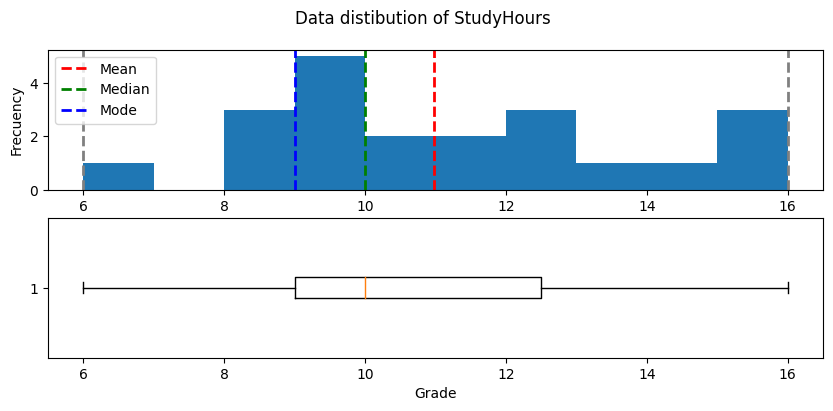

In [6]:
percentile_1 = df_students.StudyHours.quantile(0.01)

show_distribution(df_students[df_students.StudyHours>percentile_1]['StudyHours'])

Note that the distribution is not symmetric like it is for the grade data. There are some students with very high study times of around 16 hours, but the bulk of the data is between 7 and 13 hours. The few extremely high values pull the mean towards the higher end of the scale.

In [7]:
def show_density(var_data):
    fig = plt.figure(figsize=(10, 4))

    var_data.plot.density()

    plt.title('Density of {}'.format(var_data.name))

    plt.axvline(x=var_data.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(x=var_data.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(x=var_data.mode()[0], color='blue', linestyle='dashed', linewidth=2, label='Mode')

    plt.legend()

    fig.show()

In [8]:
shours_xp1 = df_students[df_students.StudyHours>percentile_1]['StudyHours']

C:\Users\elias\AppData\Local\Temp\ipykernel_17536\754539326.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


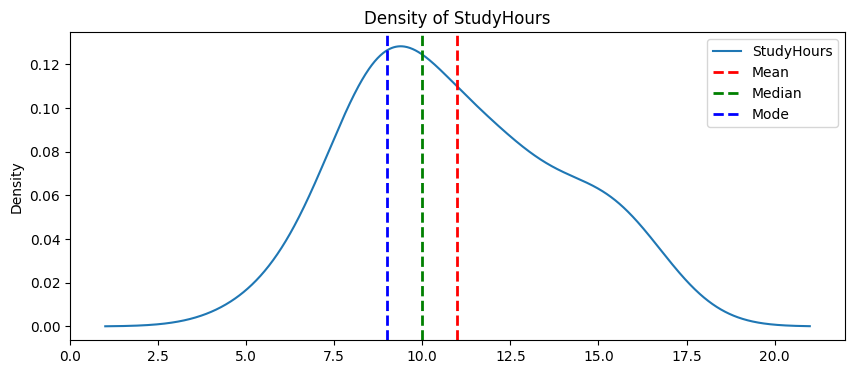

In [9]:
show_density(shours_xp1)

This kind of distribution is called right skewed. The mass of the data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end, which pull the mean to the right.

### Measure of variance

- Range: The difference between the maximum and minimum.

- Variance: The average of the squared difference from the mean.

- Standard Deviation: The square root of the variance.

In [10]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    variance = col.var()
    stdv = col.std()

    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, variance, stdv))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


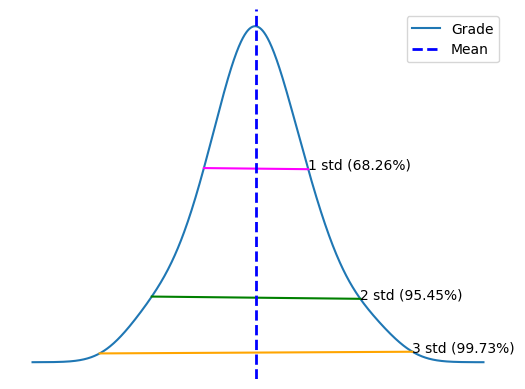

In [11]:
# See relationship between standard dev and normal distribution

import scipy.stats as stats

col = df_students['Grade']

density = stats.gaussian_kde(col)

col.plot.density()

std = col.std()
mean = col.mean()

# Annotate 1 stdev
x1 = [mean - std, mean + std]
y1 = density(x1)
plt.plot(x1, y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1], y1[1]))

# Annotate 2 stdev
x2 = [mean - 2*std, mean + 2*std]
y2 = density(x2)
plt.plot(x2, y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1], y2[1]))

# Annotate 3 stdev
x3 = [mean - 3*std, mean + 3*std]
y3 = density(x3)
plt.plot(x3, y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1], y3[1]))

# Show the location of the mean
plt.axvline(x=mean, color='blue', linestyle='dashed', linewidth=2, label='Mean')

plt.legend()

plt.axis('off')

plt.show()

The horizontal lines show the percentage of data within 1, 2, and 3 standard deviations of the mean (plus or minus).

In any normal distribution:

- Approximately 68.26% of values fall within one standard deviation from the mean.

- Approximately 95.45% of values fall within two standard deviations from the mean.

- Approximately 99.73% of values fall within three standard deviations from the mean.

So, since we know that the mean grade is 49.18, the standard deviation is 21.74, and distribution of grades is approximately normal, we can calculate that 68.26% of students should achieve a grade between 27.44 and 70.92.

In [12]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\elias\AppData\Local\Temp\ipykernel_17536\3002654940.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


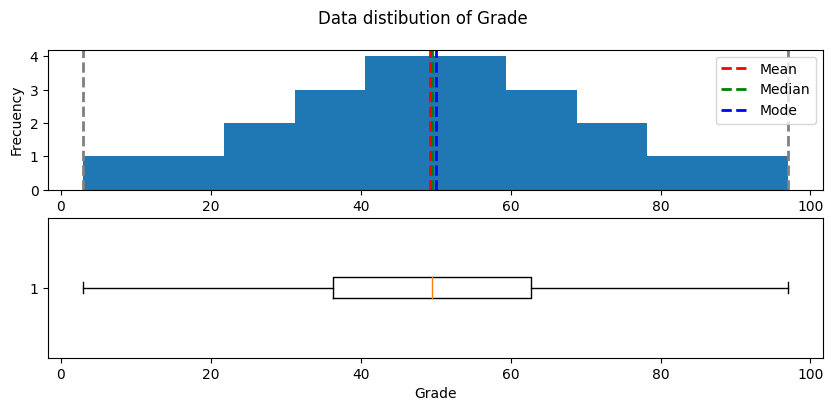

In [13]:
show_distribution(df_students['Grade'])

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\elias\AppData\Local\Temp\ipykernel_17536\3002654940.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


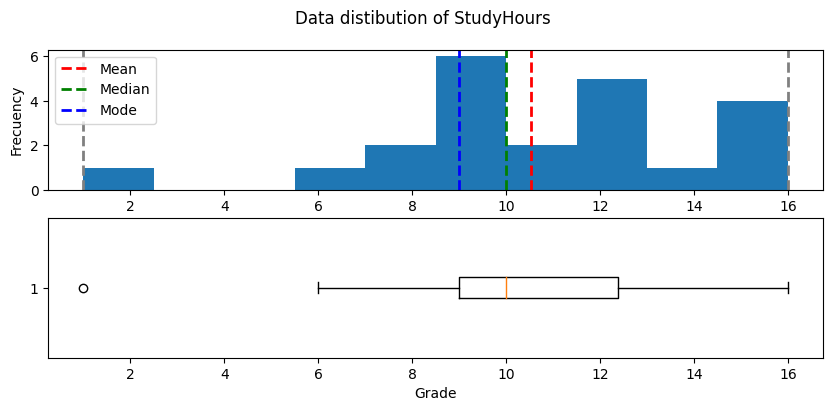

In [14]:
show_distribution(df_students['StudyHours'])

## Comparing Data

In [17]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

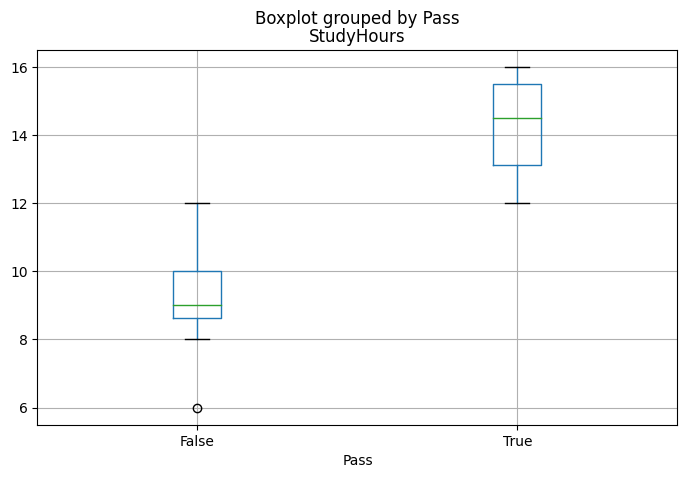

In [18]:
# Compare numeric (StudyHours) to categorical (Pass). We will use a boxplot

df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8, 5))

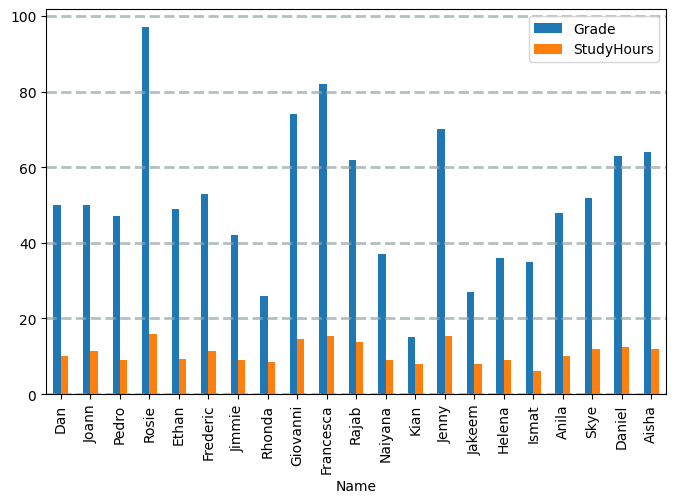

In [20]:
# Compare name vs grade vs study hours

df_sample.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8, 5)).grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

The chart shows bars for both grade and study hours for each student, but it's not easy to compare because the values are on different scales. A grade is measured in grade points (and ranges from 3 to 97), and study time is measured in hours (and ranges from 1 to 16).

A common technique when dealing with numeric data in different scales is to normalize the data so that the values retain their proportional distribution but are measured on the same scale. To accomplish this, we'll use a technique called MinMax scaling that distributes the values proportionally on a scale of 0 to 1

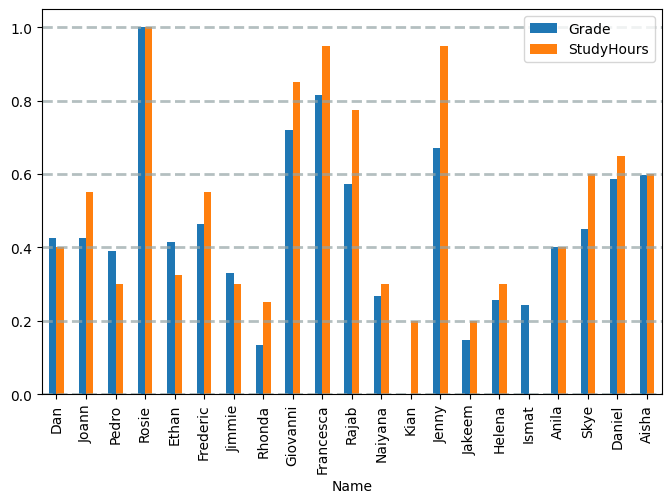

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Create a new dataframe with the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade', 'StudyHours']] = scaler.fit_transform(df_normalized[['Grade', 'StudyHours']])

df_normalized.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8, 5)).grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

In [23]:
df_normalized

,Name,Grade,StudyHours
0,Dan,0.426829,0.400
1,Joann,0.426829,0.550
2,Pedro,0.390244,0.300
3,Rosie,1.000000,1.000
4,Ethan,0.414634,0.325
6,Frederic,0.463415,0.550
7,Jimmie,0.329268,0.300
8,Rhonda,0.134146,0.250
9,Giovanni,0.719512,0.850
10,Francesca,0.817073,0.950


In [24]:
# statistical correlation measurement we can use to quantify the relationship between these columns.

df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789677

<Axes: title={'center': 'Study vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

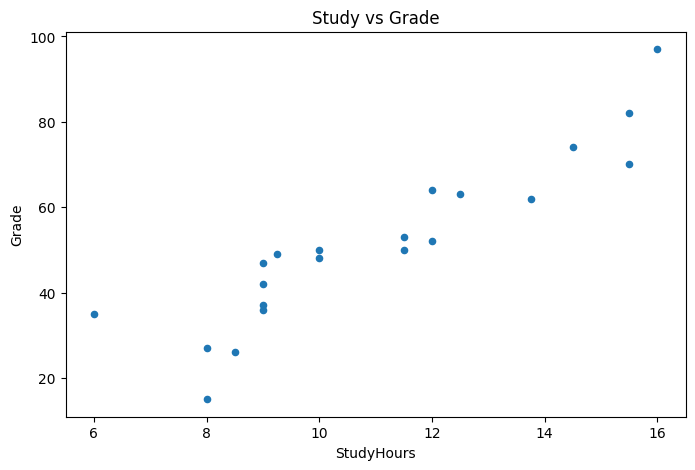

In [27]:
# Correlation plot (Scatter)

df_sample.plot.scatter(title='Study vs Grade', y='Grade', x='StudyHours', figsize=(8, 5))

In [31]:
# Linear regression
from scipy import stats

df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope (m) and intercept (b)
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])

print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the mx+b to calculate f(x) for each x value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

df_regression.sort_values(by='StudyHours')

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


,Grade,StudyHours,fx,error
17,35.0,6.00,19.964144,-15.035856
13,15.0,8.00,32.590995,17.590995
15,27.0,8.00,32.590995,5.590995
8,26.0,8.50,35.747708,9.747708
2,47.0,9.00,38.904421,-8.095579
7,42.0,9.00,38.904421,-3.095579
16,36.0,9.00,38.904421,2.904421
12,37.0,9.00,38.904421,1.904421
4,49.0,9.25,40.482777,-8.517223
0,50.0,10.00,45.217846,-4.782154


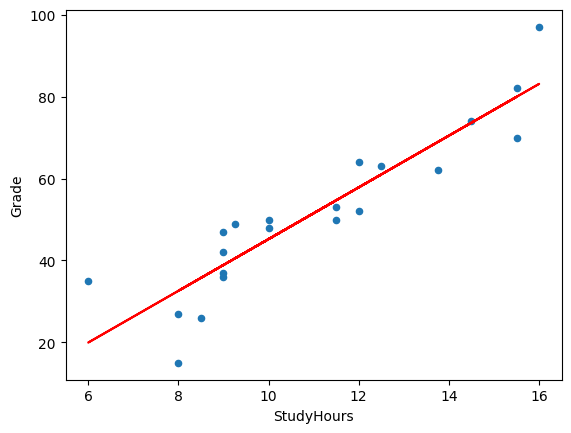

In [30]:
df_regression.plot.scatter(x='StudyHours', y='Grade')
plt.plot(df_regression['StudyHours'], df_regression['fx'], color='red')
plt.show()

In [32]:
# Estimate the expected grade 
def f(x):
    m = 6.3134
    b = -17.9164
    return (m * x) + b

In [34]:
study_hours = 14
prediction = f(study_hours)

# Grade cant be less than 0 or more than 100
expected_grade = max(0, min(100, prediction))

print('If you study {} hours per week, you may get a {:.2f} grade'.format(study_hours, expected_grade))

If you study 14 hours per week, you may get a 70.47 grade
